In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
plt.rcParams["font.family"] = 'Helvetica'
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["font.size"] = 15
plt.rcParams["axes.linewidth"] = 0.5
import seaborn as sns

In [14]:
df_PLAAC_true =pd.read_csv(
    "/Users/siomi19/Desktop/Dissertation/Dataset/comprehensive_PrLD_prediction/Files/plaac_candidates_taxonomy_AGO-name_AGO-group.tsv",
    sep="\t",
    header=0,
    index_col=None
)

In [15]:
def get_content(row, amino_acid:str):
    row[f"{amino_acid} content"] = row["PRDaa"].count(amino_acid) / len(row["PRDaa"])
    return row

In [19]:
df_PLAAC_true = ( df_PLAAC_true
    .apply(lambda x: get_content(x, "Q"), axis=1)
    .apply(lambda x: get_content(x, "G"), axis=1)
)

df_PLAAC_true["Others content"] = 1 - df_PLAAC_true["Q content"] -df_PLAAC_true["G content"]

In [84]:
phylums = ["Embryophyta", "Arthropoda", "Vertebrata"]

for p in phylums:
    df_plot = ( df_PLAAC_true[df_PLAAC_true["phylum"]==p]
    .sort_values("Others content", ascending=False)
    # .sort_values("Q content")
    .reset_index()
    .iloc[:, -3:]
    .T
    )
    print(df_plot.shape[1])
    fig, ax = plt.subplots()
    # fig, ax = plt.subplots(figsize=(0.2*df_plot.shape[1], 8))
    for i in range(df_plot.shape[0]):
        ax.barh(df_plot.columns, 
            df_plot.iloc[i], 
            left=df_plot.iloc[:i].sum(),
            height=1,
            # linewidth=1,
            # edgecolor='darkgray'
            )
    ax.legend(["Q", "G", "Others"], loc="upper right", bbox_to_anchor=(1.4, 1))
    # plt.show()
    plt.savefig(f"/Users/siomi19/Desktop/Dissertation/Dataset/comprehensive_PrLD_prediction/Figures/QG_content_{p}.svg", bbox_inches="tight")
    plt.close()

844
138
8


/var/folders/wb/nx5pq3kd2mn7__q76dgfrwqm0000gn/T/ipykernel_2401/1052606370.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


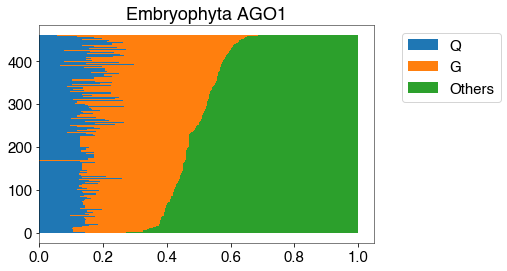

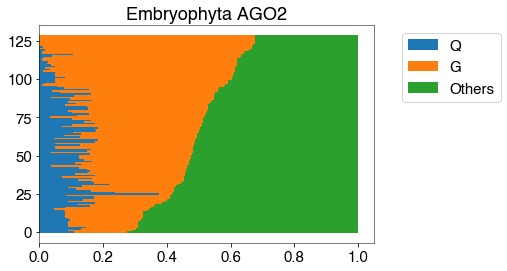

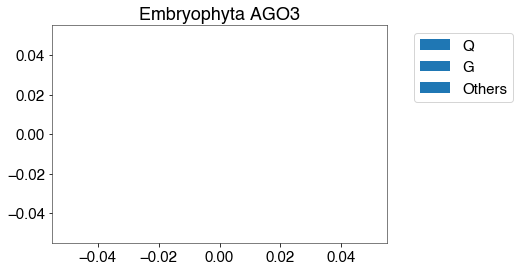

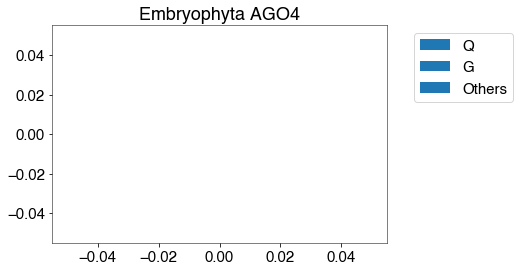

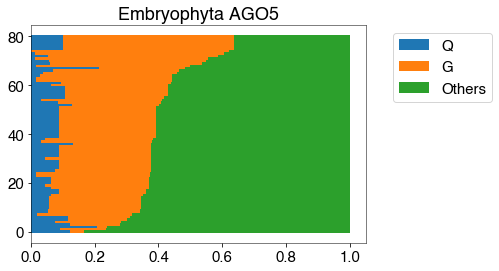

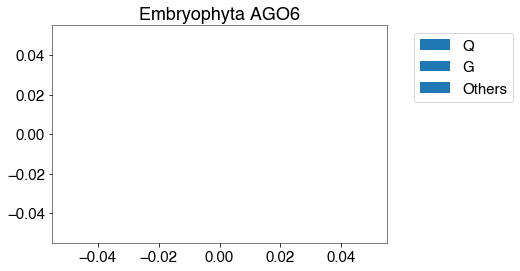

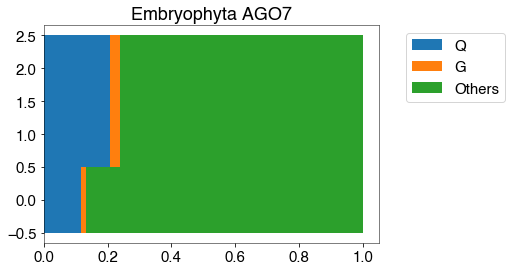

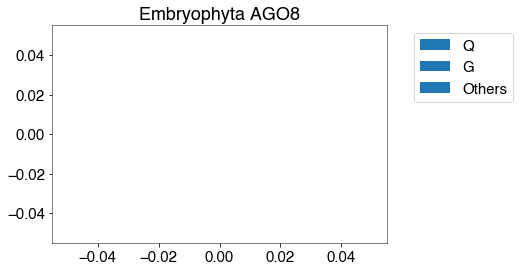

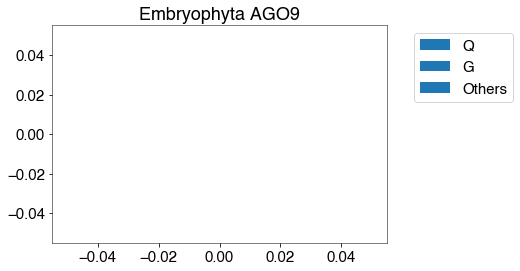

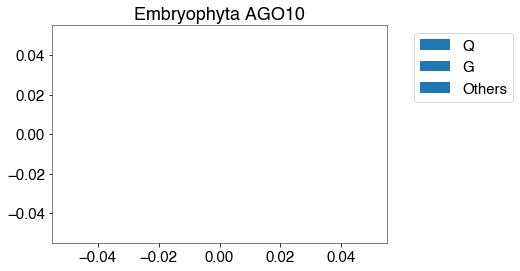

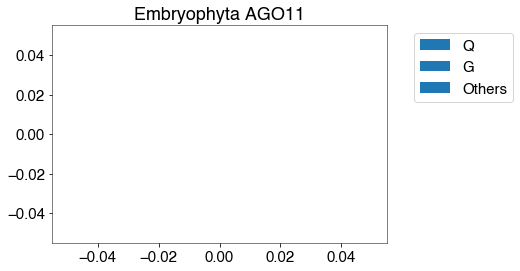

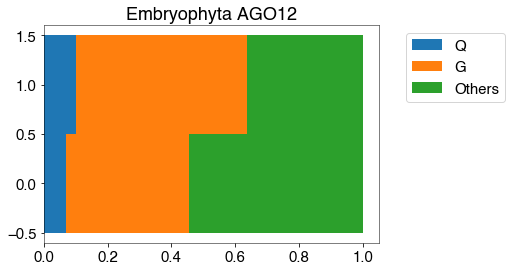

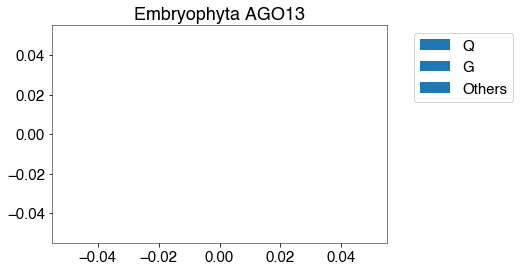

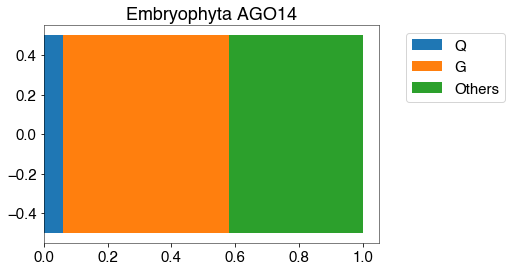

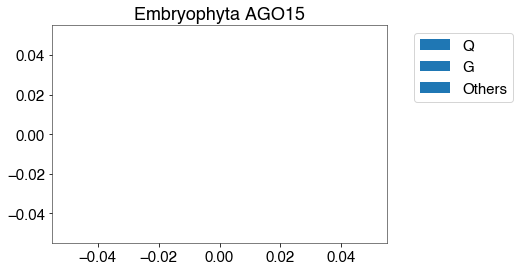

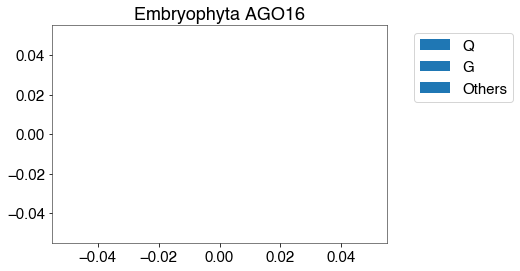

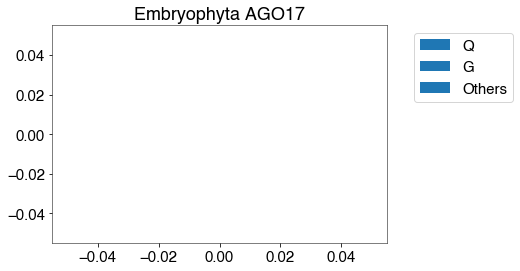

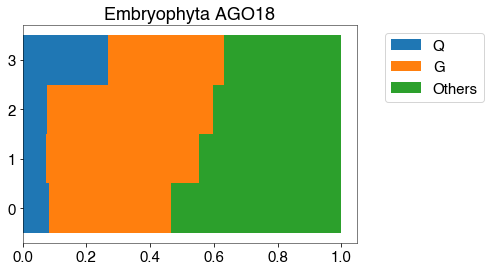

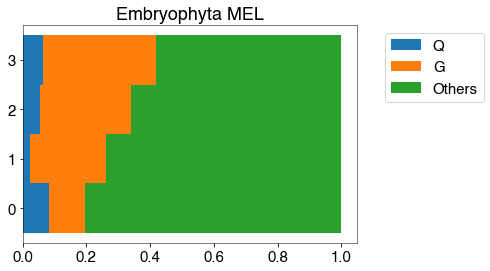

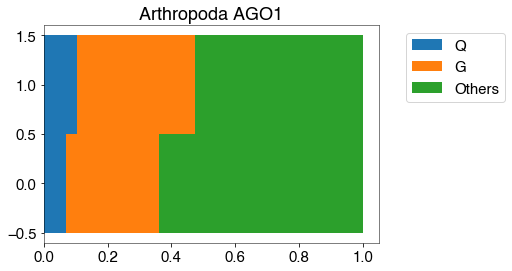

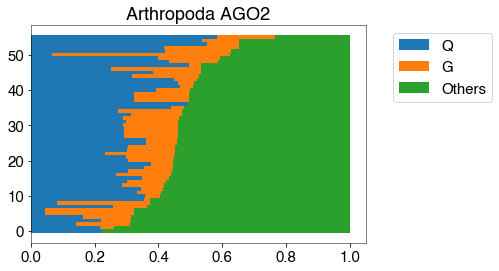

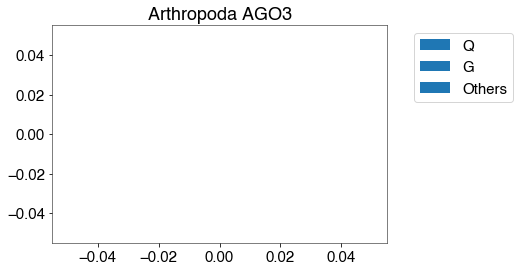

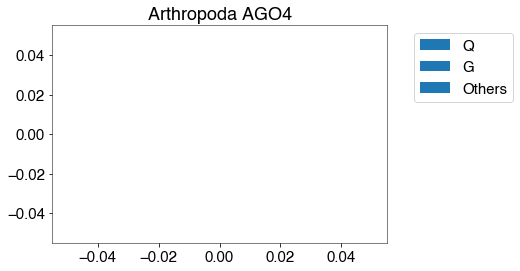

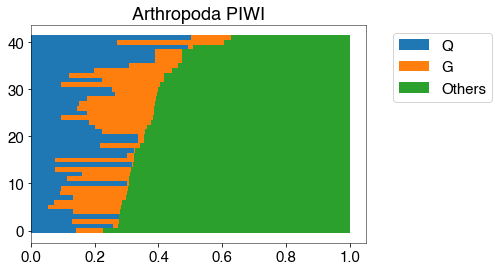

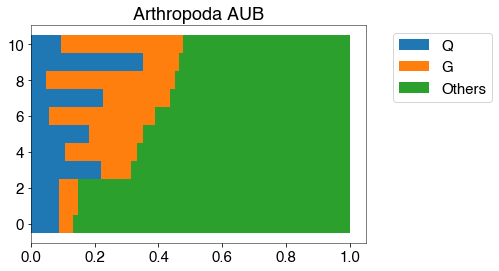

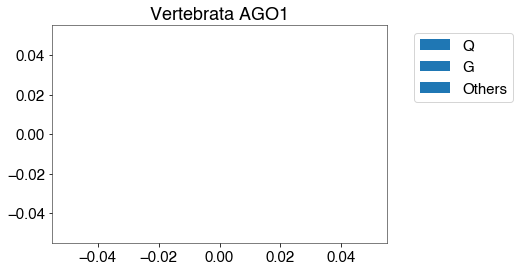

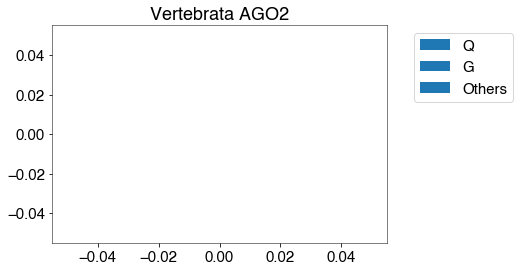

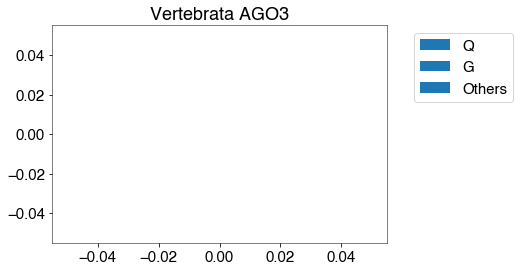

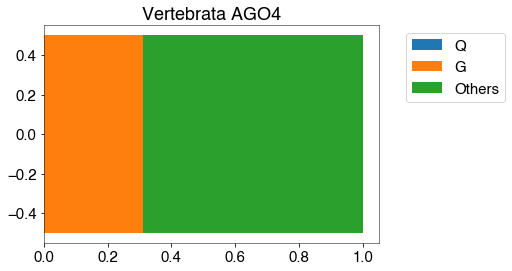

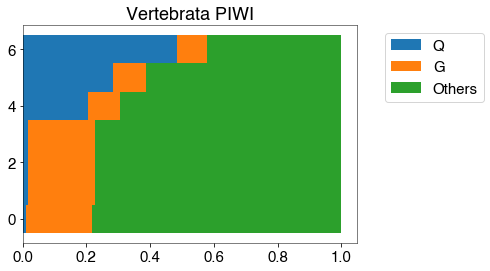

In [95]:
phylums = ["Embryophyta", "Arthropoda", "Vertebrata"]

subgroup_plant = ["AGO1", "AGO2", "AGO3", "AGO4", "AGO5", "AGO6", "AGO7","AGO8", "AGO9", "AGO10", "AGO11", "AGO12", "AGO13", "AGO14", "AGO15", "AGO16", "AGO17", "AGO18", "MEL"]
subgroup_arthropod = ["AGO1", "AGO2", "AGO3", "AGO4", "PIWI", "AUB"]
subgroup_vertebrate = ["AGO1", "AGO2", "AGO3", "AGO4", "PIWI"]

subgroups = [subgroup_plant, subgroup_arthropod, subgroup_vertebrate]

for p, s in zip(phylums, subgroups):
    for _ in s:
        df_plot = ( df_PLAAC_true[(df_PLAAC_true["phylum"]==p) & (df_PLAAC_true["AGO group"]==_)]
        .sort_values("Others content", ascending=False)
        .reset_index()
        .iloc[:, -3:]
        .T
        )
        fig, ax = plt.subplots()
        for i in range(df_plot.shape[0]):
            ax.barh(df_plot.columns, 
                df_plot.iloc[i], 
                left=df_plot.iloc[:i].sum(),
                height=1,
                # linewidth=1,
                # edgecolor='darkgray'
                )
        ax.legend(["Q", "G", "Others"], loc="upper right", bbox_to_anchor=(1.4, 1))
        ax.set_title(f"{p} {_}")
    # plt.show()
    # plt.savefig(f"/Users/siomi19/Desktop/Dissertation/Dataset/comprehensive_PrLD_prediction/Figures/QG_content_{p}_{_}.svg", bbox_inches="tight")
    # plt.close()